In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [14]:
start = '2012-01-01'
end = '2022-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [15]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2763,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2764,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2765,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
2766,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700


In [16]:
ma_100_days = data.Close.rolling(100).mean()

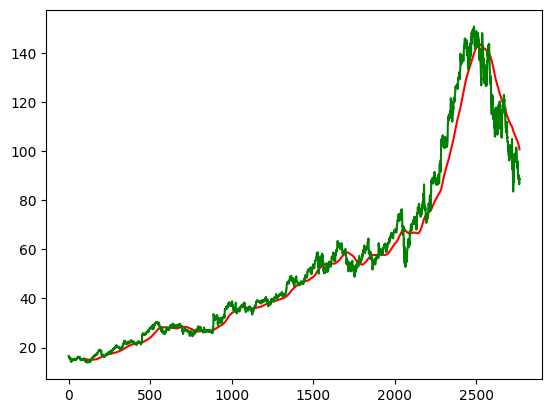

In [17]:
plt.figure(figure=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(data.Close, "g")
plt.show()


In [19]:
ma_200_days = data.Close.rolling(200).mean()

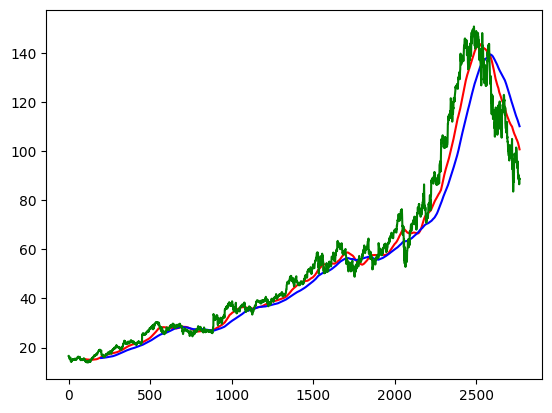

In [20]:
plt.figure(figure=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(ma_200_days, "b")
plt.plot(data.Close, "g")
plt.show()

In [21]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.8)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.8): len(data)])

In [24]:
data_train.shape

(2214, 1)

In [25]:
data_test.shape

(554, 1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_train_scale = scaler.fit_transform(data_train)
data_train_scale.shape

(2214, 1)

In [59]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i,0])    

In [61]:
x, y = np.array(x), np.array(y)

In [36]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [68]:

model = Sequential()
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = ((x.shape[1], 1))))

model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [73]:
model.compile(optimizer='adam', loss='mse')

In [75]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50

67/67 [==============================] - 16s 168ms/step - loss: 0.0392
Epoch 2/50
67/67 [==============================] - 10s 155ms/step - loss: 0.0072
Epoch 3/50
67/67 [==============================] - 11s 157ms/step - loss: 0.0059
Epoch 4/50
67/67 [==============================] - 11s 165ms/step - loss: 0.0061
Epoch 5/50
67/67 [==============================] - 10s 155ms/step - loss: 0.0050
Epoch 6/50
67/67 [==============================] - 10s 155ms/step - loss: 0.0055
Epoch 7/50
67/67 [==============================] - 11s 160ms/step - loss: 0.0049
Epoch 8/50
67/67 [==============================] - 10s 155ms/step - loss: 0.0046
Epoch 9/50
67/67 [==============================] - 11s 161ms/step - loss: 0.0042
Epoch 10/50
67/67 [==============================] - 10s 148ms/step - loss: 0.0040
Epoch 11/50
67/67 [==============================] - 10s 149ms/step - loss: 0.0043
Epoch 12/50
67/67 [==============================] - 11s 168ms/step - loss: 0.0040
Epoch 13/50


In [76]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_10 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_11 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_15 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_12 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_16 (LSTM)              (None, 120)             

In [77]:
pas_100_days = data_train.tail(100)

In [79]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [80]:
data_test

,Close
0,71.445999
1,71.591003
2,71.960999
3,71.819000
4,70.609001
...,...
649,89.809998
650,87.930000
651,86.459999
652,88.949997


In [82]:
data_test_scale = scaler.fit_transform(data_test)

In [83]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100: i])
    y.append(data_test_scale[i,0])    

In [84]:
x, y = np.array(x), np.array(y)

In [85]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 52ms/step


In [87]:
scale = 1/scaler.scale_

In [88]:
y_predict = y_predict*scale

In [89]:
y = y*scale

In [90]:
y


array([ 9.80149841, 11.67049408, 12.77149963, 14.05500031, 11.52749634,
       12.21799469,  7.83599854, 10.36699677, 13.05549622, 13.30649567,
       14.5154953 , 19.46149445, 20.17350006, 20.09249878, 20.15499878,
       19.02449799, 19.6404953 , 19.49699402, 20.85599518, 21.0739975 ,
       20.51249695, 19.34399414, 20.2009964 , 19.11449432, 18.74799347,
       20.4489975 , 20.57649994, 21.66449738, 20.04199982, 21.90999603,
       23.40249634, 23.34349823, 23.40449524, 22.97899628, 22.93249512,
       21.21149445, 20.77149963, 21.09349823, 20.00799561, 20.39349365,
       20.15499878, 19.3999939 , 18.55549622, 18.97349548, 18.18000031,
       18.62400055, 18.94749451, 20.80949402, 19.94099426, 18.98099518,
       19.59899902, 18.41699982, 19.05099487, 18.76950073, 21.36750031,
       22.36549377, 20.34099579, 19.33249664, 19.72499847, 19.01399994,
       18.8144989 , 21.54799652, 26.34999847, 26.56749725, 27.05749512,
       26.97499847, 27.86699677, 23.54449463, 25.16049957, 23.79

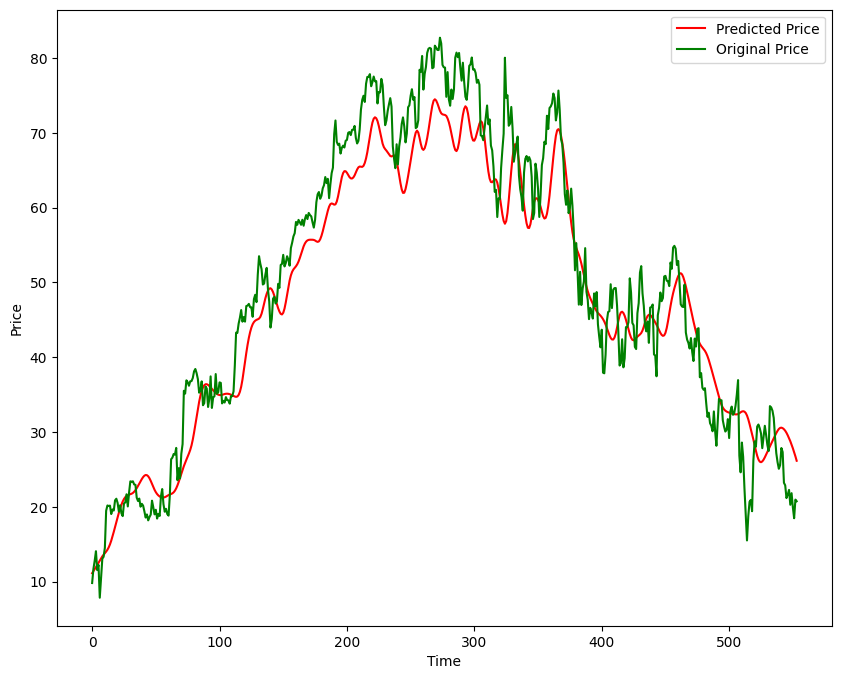

In [101]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, "r", label="Predicted Price")
plt.plot(y, "g", label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [97]:
model.save("Stock Preciction Model.keras")